<a href="https://colab.research.google.com/github/coopkim/red-zone-efficiency/blob/main/Red_Zone_Efficiency_vs_Wins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
url="https://docs.google.com/spreadsheets/d/1DFtKjFi798Kb8MeIXlGf01ZyV0zGr1A_vIjLucVrqqw/export?format=csv"
df = pd.read_csv(url, on_bad_lines='skip', header=1)

In [ ]:
# TO DO LIST
df = pd.read_csv(url, on_bad_lines='skip', header=1)

# - for each game date with NaN, replace the value with the closest date above
df['Game Date'] = df['Game Date'].fillna(method='ffill')

# - replace NaNs in 3 percentage columns with 0
df['Field Goal'] = df['Field Goal'].apply(lambda x: float(str(x).replace('%', ''))).fillna(0).astype(float)
df['Touchdown'] = df['Touchdown'].apply(lambda x: float(str(x).replace('%', ''))).fillna(0).astype(float)
df['Turnover'] = df['Turnover'].apply(lambda x: float(str(x).replace('%', ''))).fillna(0).astype(float)

# - get rid of grand total row at the bottom
df = df.iloc[:-1,:]

# convert date to datetime object
df['Game Date'] = pd.to_datetime(df['Game Date'])

# apply mapping
# df['Team'] = df['Team'] \
#   .replace('BAL', 'Baltimore Ravens') \
#   .replace('BUF', 'Buffalo Bills') \
#   .replace('CAR', 'Carolina Panthers') \
#   .replace('DAL', 'Dallas Cowboys') \
#   .replace('DEN', 'Denver Broncos') \
#   .replace('NE', 'New England Patriots') \
#   .replace('NYG', 'New York Giants') \
#   .replace('PIT', 'Pittsburgh Steelers') \
#   .replace('SF', 'San Francisco 49ers') \
#   .replace('TEN', 'Tennessee Titans') \

df

,Game Date,Team Name,Field Goal,Touchdown,Turnover
0,2023-09-07,Detroit Lions,0.0,50.0,50.0
1,2023-09-07,Kansas City Chiefs,50.0,50.0,0.0
2,2023-09-10,Arizona Cardinals,100.0,0.0,0.0
3,2023-09-10,Atlanta Falcons,0.0,100.0,0.0
4,2023-09-10,Baltimore Ravens,20.0,60.0,20.0
...,...,...,...,...,...
411,2023-12-11,Buffalo Bills,0.0,100.0,0.0
412,2023-12-11,Green Bay Packers,50.0,50.0,0.0
413,2023-12-11,Jacksonville Jaguars,100.0,0.0,0.0
414,2023-12-11,Miami Dolphins,25.0,50.0,25.0


In [ ]:
df['Team Name'].value_counts().reset_index().sort_values(by='index')

,index,Team Name
30,Arizona Cardinals,12
24,Atlanta Falcons,13
23,Baltimore Ravens,13
0,Buffalo Bills,14
22,Carolina Panthers,13
2,Chicago Bears,14
21,Cincinnati Bengals,13
20,Cleveland Browns,13
28,Dallas Cowboys,12
19,Denver Broncos,13


In [ ]:
sked_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1J4q-1vx-ShO_kmvGrhVNwhY4X5q27Ouz6f1K8WxMUnE/export?format=csv', header=0)
sked_df = sked_df[sked_df['Date'] != 'Playoffs']
sked_df['Date'] = pd.to_datetime(sked_df['Date'])
sked_df['margin'] = sked_df['PtsW'] - sked_df['PtsL']
sked_df.head(20)

,Week,Day,Date,Time,Winner/tie,Unnamed: 5,Loser/tie,Filter,Unnamed: 8,PtsW,PtsL,YdsW,TOW,YdsL,TOL,margin
0,1,Thu,2023-09-07,8:20 PM,Detroit Lions,@,Kansas City Chiefs,NaN,boxscore,21.0,20.0,368.0,1.0,316.0,1.0,1.0
1,1,Sun,2023-09-10,1:00 PM,Atlanta Falcons,NaN,Carolina Panthers,NaN,boxscore,24.0,10.0,221.0,0.0,281.0,3.0,14.0
2,1,Sun,2023-09-10,1:00 PM,Cleveland Browns,NaN,Cincinnati Bengals,NaN,boxscore,24.0,3.0,350.0,2.0,142.0,0.0,21.0
3,1,Sun,2023-09-10,1:00 PM,Jacksonville Jaguars,@,Indianapolis Colts,NaN,boxscore,31.0,21.0,342.0,2.0,280.0,3.0,10.0
4,1,Sun,2023-09-10,1:00 PM,Washington Commanders,NaN,Arizona Cardinals,NaN,boxscore,20.0,16.0,248.0,3.0,210.0,2.0,4.0
5,1,Sun,2023-09-10,1:00 PM,Baltimore Ravens,NaN,Houston Texans,NaN,boxscore,25.0,9.0,265.0,2.0,268.0,1.0,16.0
6,1,Sun,2023-09-10,1:00 PM,Tampa Bay Buccaneers,@,Minnesota Vikings,NaN,boxscore,20.0,17.0,242.0,0.0,369.0,3.0,3.0
7,1,Sun,2023-09-10,1:00 PM,New Orleans Saints,NaN,Tennessee Titans,NaN,boxscore,16.0,15.0,351.0,2.0,285.0,3.0,1.0
8,1,Sun,2023-09-10,1:00 PM,San Francisco 49ers,@,Pittsburgh Steelers,NaN,boxscore,30.0,7.0,391.0,1.0,239.0,2.0,23.0
9,1,Sun,2023-09-10,4:25 PM,Green Bay Packers,@,Chicago Bears,NaN,boxscore,38.0,20.0,329.0,0.0,311.0,2.0,18.0


In [ ]:
filtered_df = sked_df[['Date', 'Winner/tie', 'Loser/tie', 'margin']]
winner_df = df.copy()
winner_df.columns = ['Game Date', 'Team Name', 'Field Goal W', 'Touchdown W', 'Turnover W']
loser_df = df.copy()
loser_df.columns = ['Game Date', 'Team Name', 'Field Goal L', 'Touchdown L', 'Turnover L']
game_df = filtered_df.merge(winner_df, how='inner', left_on=['Date', 'Winner/tie'], right_on=['Game Date', 'Team Name'])
game_df = game_df.drop(columns=['Game Date', 'Team Name'])
game_df = game_df.merge(loser_df, how='inner', left_on=['Date', 'Loser/tie'], right_on=['Game Date', 'Team Name'])
game_df = game_df.drop(columns=['Game Date', 'Team Name'])
game_df

# winner_df.columns = ['Date', 'Tm', 'Margin']
# loser_df = sked_df[['Date', 'Loser/tie', 'margin']]
# loser_df.columns = ['Date', 'Tm', 'Margin']
# loser_df['Margin'] = loser_df['Margin'] * -1
# dfA = df.merge(winner_df, how='inner', left_on=['Game Date', 'Team'], right_on=['Date', 'Tm'])
# dfB = df.merge(loser_df, how='inner', left_on=['Game Date', 'Team'], right_on=['Date', 'Tm'])
# merged = pd.concat([dfA, dfB], axis=0, ignore_index=True)
# merged = merged.drop(columns=['Date', 'Tm'], axis=1)
# merged

,Date,Winner/tie,Loser/tie,margin,Field Goal W,Touchdown W,Turnover W,Field Goal L,Touchdown L,Turnover L
0,2023-09-07,Detroit Lions,Kansas City Chiefs,1.0,0.00,50.00,50.00,50.0,50.0,0.0
1,2023-09-10,Atlanta Falcons,Carolina Panthers,14.0,0.00,100.00,0.00,50.0,50.0,0.0
2,2023-09-10,Cleveland Browns,Cincinnati Bengals,21.0,50.00,33.33,16.67,100.0,0.0,0.0
3,2023-09-10,Jacksonville Jaguars,Indianapolis Colts,10.0,0.00,100.00,0.00,0.0,100.0,0.0
4,2023-09-10,Washington Commanders,Arizona Cardinals,4.0,40.00,40.00,20.00,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
194,2023-12-10,San Francisco 49ers,Seattle Seahawks,12.0,0.00,100.00,0.00,50.0,50.0,0.0
195,2023-12-10,Buffalo Bills,Kansas City Chiefs,3.0,33.33,66.67,0.00,0.0,100.0,0.0
196,2023-12-10,Denver Broncos,Los Angeles Chargers,17.0,50.00,50.00,0.00,50.0,50.0,0.0
197,2023-12-10,Dallas Cowboys,Philadelphia Eagles,20.0,0.00,100.00,0.00,0.0,100.0,0.0


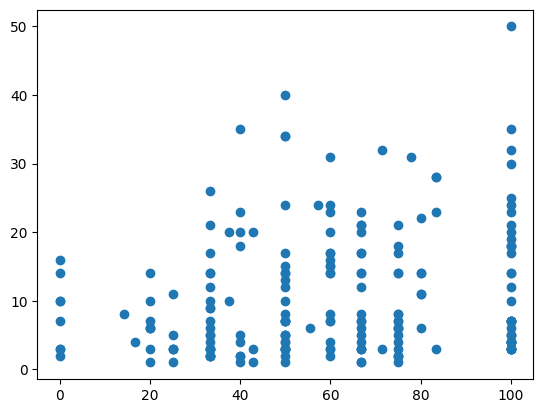

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(game_df['Touchdown W'], game_df['margin'])

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = game_df.copy()

# Assuming df is your DataFrame
# Drop irrelevant columns like 'Game Date' and 'Team'
df = df.drop(['Date', 'Winner/tie', 'Loser/tie'], axis=1)

# Split data into features (X) and target variable (y)
X = df[['Field Goal W', 'Touchdown W', 'Turnover W', 'Field Goal L', 'Touchdown L', 'Turnover L']]
y = df['margin']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

# Initialize the standard scaler
scaler = StandardScaler()

# Fit the scaler on the training data ONLY
scaler.fit(X_train)

# Transform the training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

(159, 6) (40, 6)
Mean Squared Error: 64.18504127364807
R-squared: 0.1148035509387847


In [ ]:
model.coef_

array([ 9680.93411479, 10865.3483804 ,  5977.34298854, 20632.25756267,
       22135.88946203, 13592.03601755])

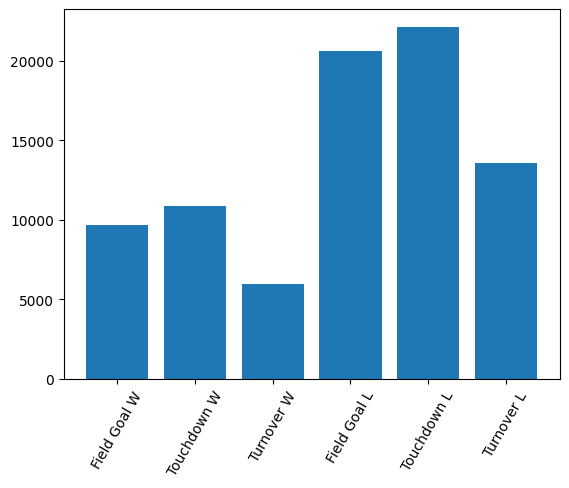

In [ ]:
plt.bar(X.columns, model.coef_)
plt.xticks(rotation=60);

Unresolved Issues:
- Data is only through December 2023
- Percentages may not be a good indicator of how many scoring opportunities there were in total
- Very hard to predict win likelihood given that we have no info about the opponent's red zone efficiency

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = game_df.copy()

# Assuming df is your DataFrame
# Drop irrelevant columns like 'Game Date' and 'Team'
df = df.drop(['Date', 'Winner/tie', 'Loser/tie', 'margin'], axis=1)

# Split data into features (X) and target variable (y)
df1 = df.iloc[:100]
df2 = df.iloc[100:]
df2 = df2[['Field Goal L', 'Touchdown L', 'Turnover L', 'Field Goal W', 'Touchdown W', 'Turnover W']]
X = pd.concat([df1, df2], axis=0, ignore_index=True)

y = [*([1] * df1.shape[0]), *([0] * df2.shape[0])]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

# Initialize the standard scaler
scaler = StandardScaler()

# Fit the scaler on the training data ONLY
scaler.fit(X_train)

# Transform the training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

# Predict on the scaled test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
acc = accuracy_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Accuracy Score:", acc)
print("R-squared:", r2)

(159, 6) (40, 6)
Accuracy Score: 0.575
R-squared: -0.7042606516290724


In [ ]:
proba = model.predict_proba(X_train_scaled)
X_train['proba'] = proba[:,0]
X_train

,Field Goal W,Touchdown W,Turnover W,Field Goal L,Touchdown L,Turnover L,proba
183,0.00,100.00,0.00,50.00,50.00,0.0,0.612941
38,60.00,40.00,0.00,50.00,50.00,0.0,0.487503
24,40.00,60.00,0.00,60.00,40.00,0.0,0.520851
142,66.67,33.33,0.00,25.00,50.00,25.0,0.460378
141,75.00,25.00,0.00,0.00,100.00,0.0,0.501204
...,...,...,...,...,...,...,...
106,0.00,100.00,0.00,50.00,50.00,0.0,0.612941
14,33.33,50.00,16.67,50.00,0.00,50.0,0.370390
92,40.00,60.00,0.00,33.33,66.67,0.0,0.545042
179,0.00,100.00,0.00,0.00,75.00,25.0,0.622141


In [ ]:
game_df

,Date,Winner/tie,Loser/tie,margin,Field Goal W,Touchdown W,Turnover W,Field Goal L,Touchdown L,Turnover L
0,2023-09-07,Detroit Lions,Kansas City Chiefs,1.0,0.00,50.00,50.00,50.0,50.0,0.0
1,2023-09-10,Atlanta Falcons,Carolina Panthers,14.0,0.00,100.00,0.00,50.0,50.0,0.0
2,2023-09-10,Cleveland Browns,Cincinnati Bengals,21.0,50.00,33.33,16.67,100.0,0.0,0.0
3,2023-09-10,Jacksonville Jaguars,Indianapolis Colts,10.0,0.00,100.00,0.00,0.0,100.0,0.0
4,2023-09-10,Washington Commanders,Arizona Cardinals,4.0,40.00,40.00,20.00,100.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
194,2023-12-10,San Francisco 49ers,Seattle Seahawks,12.0,0.00,100.00,0.00,50.0,50.0,0.0
195,2023-12-10,Buffalo Bills,Kansas City Chiefs,3.0,33.33,66.67,0.00,0.0,100.0,0.0
196,2023-12-10,Denver Broncos,Los Angeles Chargers,17.0,50.00,50.00,0.00,50.0,50.0,0.0
197,2023-12-10,Dallas Cowboys,Philadelphia Eagles,20.0,0.00,100.00,0.00,0.0,100.0,0.0
